In [13]:
import regression_tools
from linear_regression import  LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import regression_tools

In [14]:
from importlib import reload
reload(regression_tools)





<module 'regression_tools' from '/home/vsevolod/Documents/python_stuff/andrew-ml-course-expirements/regression_tools.py'>

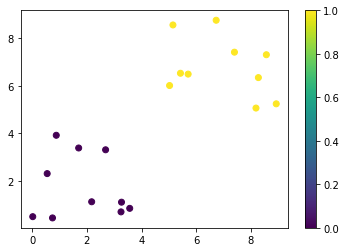

In [15]:
def generate_classification_data(zero_data_size, one_data_size):
    np.random.seed(100)
    X = np.random.rand(zero_data_size+one_data_size, 2)
    X[:zero_data_size] *= 4
    X[-one_data_size:] *= 4
    X[-one_data_size:] += 5

    y_zeros = np.zeros(zero_data_size)[:, np.newaxis]
    y_ones = np.ones(one_data_size)[:, np.newaxis]
    Y = np.vstack((y_zeros, y_ones))
    return X, Y

X, Y = generate_classification_data(10, 10)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.colorbar()

In [16]:
class LogisticRegression(LinearRegression):

    def predict(self, X):
        return LogisticRegression.sigmoid(super().predict(X))

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.e ** (-z))

    def error(self):
        cost =  -np.sum((self.Y * np.log2(self.predict_with_transformation(self.X))
                 + (1 - self.Y) * np.log2(1 - self.predict_with_transformation(self.X)) ))
        return (1 / self.m) * cost

    def plot(self, x_range: list, y_range:list, axis: plt.Axes=None):

        if axis is None:
            axis = plt.gca()
        linspace_values = 100
        x = np.linspace(*x_range, num=linspace_values)
        y = np.linspace(*y_range, num=linspace_values)
        xx, yy =np.meshgrid(x, y)
        X = np.hstack([np.ravel(xx)[:, np.newaxis], np.ravel(yy)[:, np.newaxis]])
        predicted_values = self.predict_with_transformation(X).reshape(linspace_values, linspace_values)
        axis.contourf(xx, yy, predicted_values, 20)

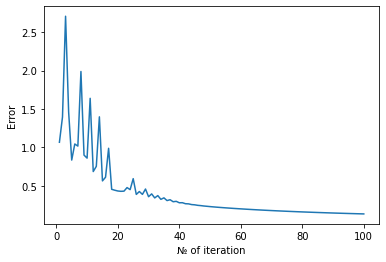

In [17]:
pipe = regression_tools.PipeLine()
pipe.add(regression_tools.n_degree_polynomial(1))
# pipe.add(regression_tools.scale_data)

l = LogisticRegression(X, Y, pipe, 0.5)
l.learn_and_plot_error(100);

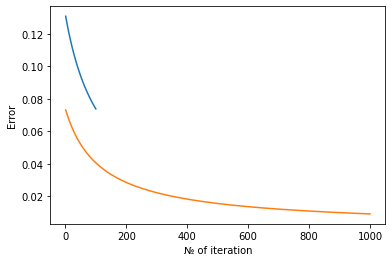

In [18]:
l.learn_and_plot_error(100, 0.5)
l.learn_and_plot_error(1000, 1)

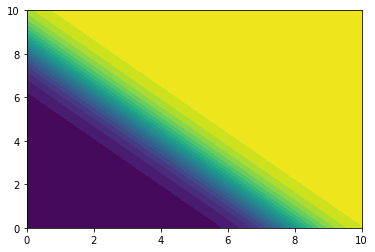

In [19]:
l.plot((0, 10), (0, 10))


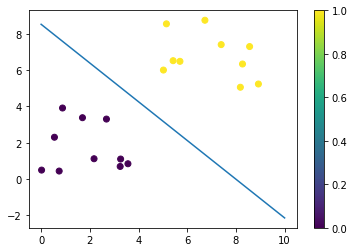

In [20]:
def plot_logistic_regression(regression, x1_start, x1_end):
    theta = regression.parameters
    X1 = np.array([x1_start, x1_end])
    X2 = -(+ theta[0] + theta[1] * X1) / theta[2]
    plt.scatter(regression.X[:, 0], regression.X[:, 1], c=regression.Y)
    plt.colorbar()
    plt.plot(X1, X2)

plot_logistic_regression(l, 0, 10)

In [21]:
l.parameters = np.array([-7.55139917, 0.85435291, 0.89663961 ])[:, np.newaxis]
l.predict_with_transformation(np.array([[3, 3]]))

array([[0.09125377]])

In [22]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X, Y)
print(f'intercept: {model.intercept_}, coef: {model.coef_}')


intercept: [-7.55139917], coef: [[0.85435291 0.89663961]]


/home/vsevolod/anaconda3/envs/main/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
